<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Gamma Selection**

Gamma Correction pada citra
-----------------------------------------
Masukkan nilai Gamma: 3


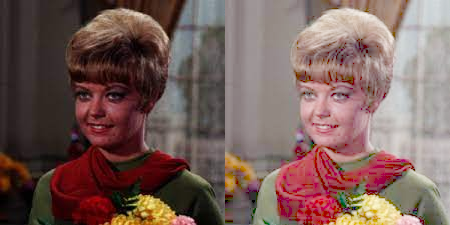

In [ ]:
print('Gamma Correction pada citra')
print('-----------------------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y, x, c] = np.clip(255 * (original[y, x, c] / 255.0) ** (1 / gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


# **Image Depth**

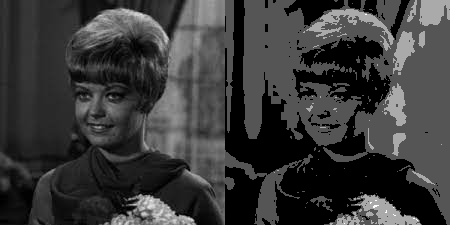

In [ ]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

# **Average Denoising**

In [ ]:
from math import log10, sqrt

ori = cv.imread('/content/drive/MyDrive/PCVK/img/female.jpg')
cv_img = []

# Loop melalui semua berkas gambar dan tambahkan ke list cv2_img
for img in glob.glob('/content/drive/MyDrive/PCVK/img/female.jpg'):  # Sesuaikan ekstensi dengan format gambar yang Anda miliki
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

# Menghitung PSNR untuk citra denoising
value = PSNR(ori, compressed)
print(f"Nilai PSNR Denoising: {value} dB")

final_frame = cv.hconcat((ori, dst))
cv2_imshow(final_frame)


IndexError: ignored

# **Masking**

AND (Dan)

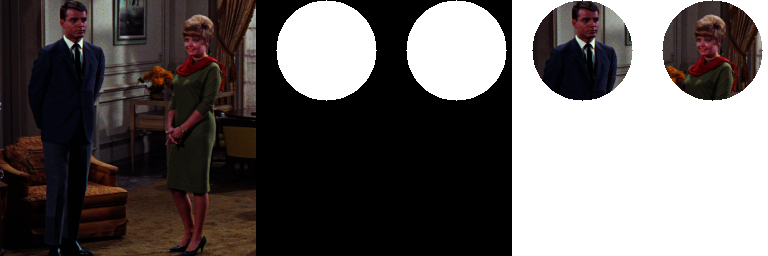

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img & mask & mask2
masked[mask==0] = 255

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

NOT (komplemen)

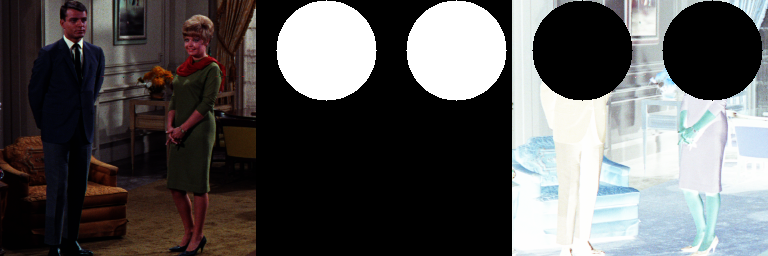

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

OR (atau)

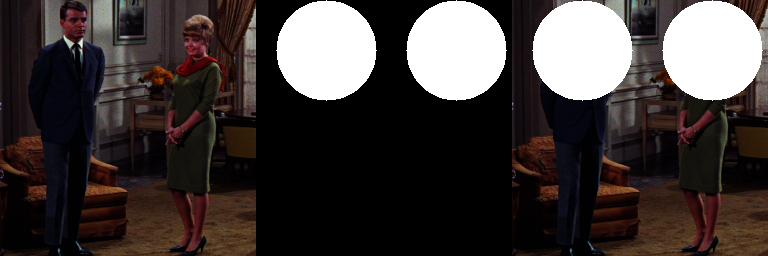

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img | mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

NAND (Not And)

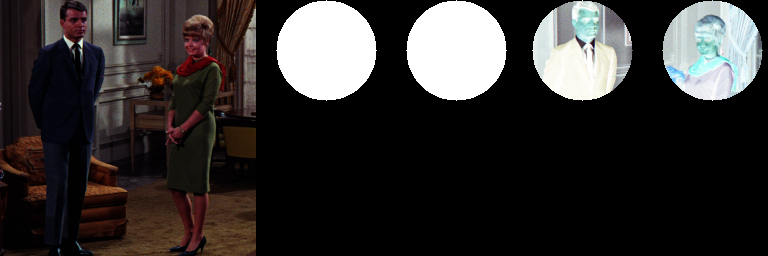

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = ~img & mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

XOR (Exclusive Or)

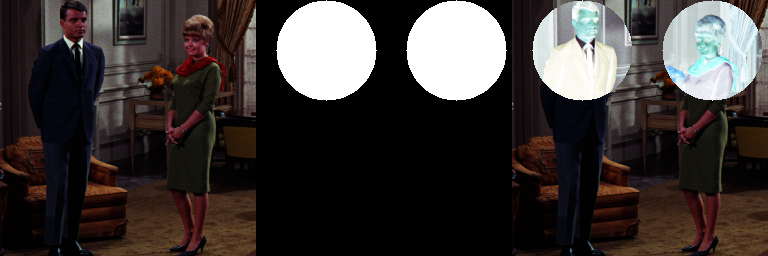

In [ ]:
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 50), 50, (255, 255, 255), -1)

masked = img ^ mask

final_frame = cv.hconcat((img, mask, masked))
cv2_imshow(final_frame)

#**Tugas**
Kelompok 3 ambil bagian Gol. Darah dan TTD.

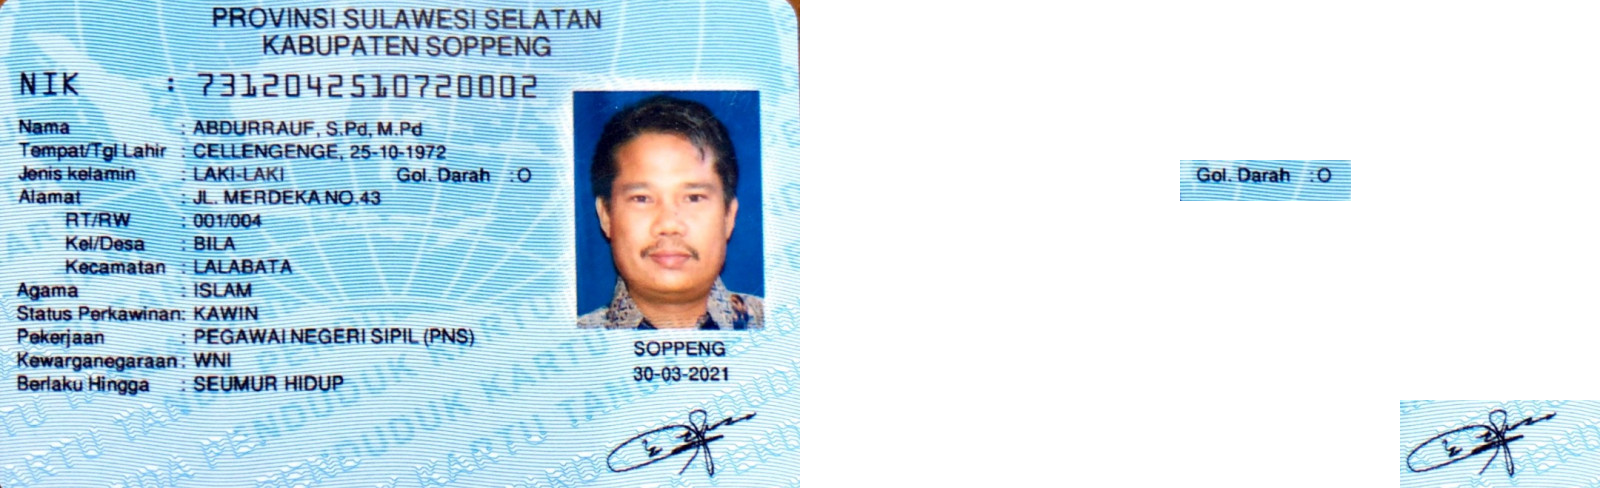

In [ ]:
img = cv.imread('/content/KTP.jpeg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask, (380, 160), (550, 200), (255, 255, 255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask, (600, 400), (800, 500), (255, 255, 255), -1)

masked = img & mask & mask2
masked[mask==0] = 255

final_frame = cv.hconcat((img,masked))
cv2_imshow(final_frame)